In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%load_ext jupyter_black


1. **loan_id**: A unique identifier for each loan.
2. **no_of_dependents**: The number of dependents the borrower is responsible for.
3. **education**: The education level of the borrower (graduate, not graduate).
4. **self_employed**: Indicates whether the borrower is self-employed (e.g., Yes/No).
5. **income_annum**: The borrower's annual income.
6. **loan_amount**: The amount of the loan.
7. **loan_term**: The term of the loan, typically expressed in months.
8. **cibil_score**: The borrower's CIBIL score, which ranges from 300 to 900 and indicates creditworthiness.
9. **residential_assets_value**: The value of the borrower's residential assets.
10. **commercial_assets_value**: The value of the borrower's commercial assets.
11. **luxury_assets_value**: The value of the borrower's luxury assets.
12. **bank_asset_value**: The value of the borrower's bank assets.
13. **loan_status**: The status of the loan application (e.g., approved, rejected).



In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [7]:
# There are spaces in column naming.
df.columns = [col.strip() for col in df.columns]

In [8]:
# Likewise, there are spaces in feature values
print(df["education"].unique().tolist())
for col in df.select_dtypes("object"):
    df[col] = df[col].str.strip()

[' Graduate', ' Not Graduate']


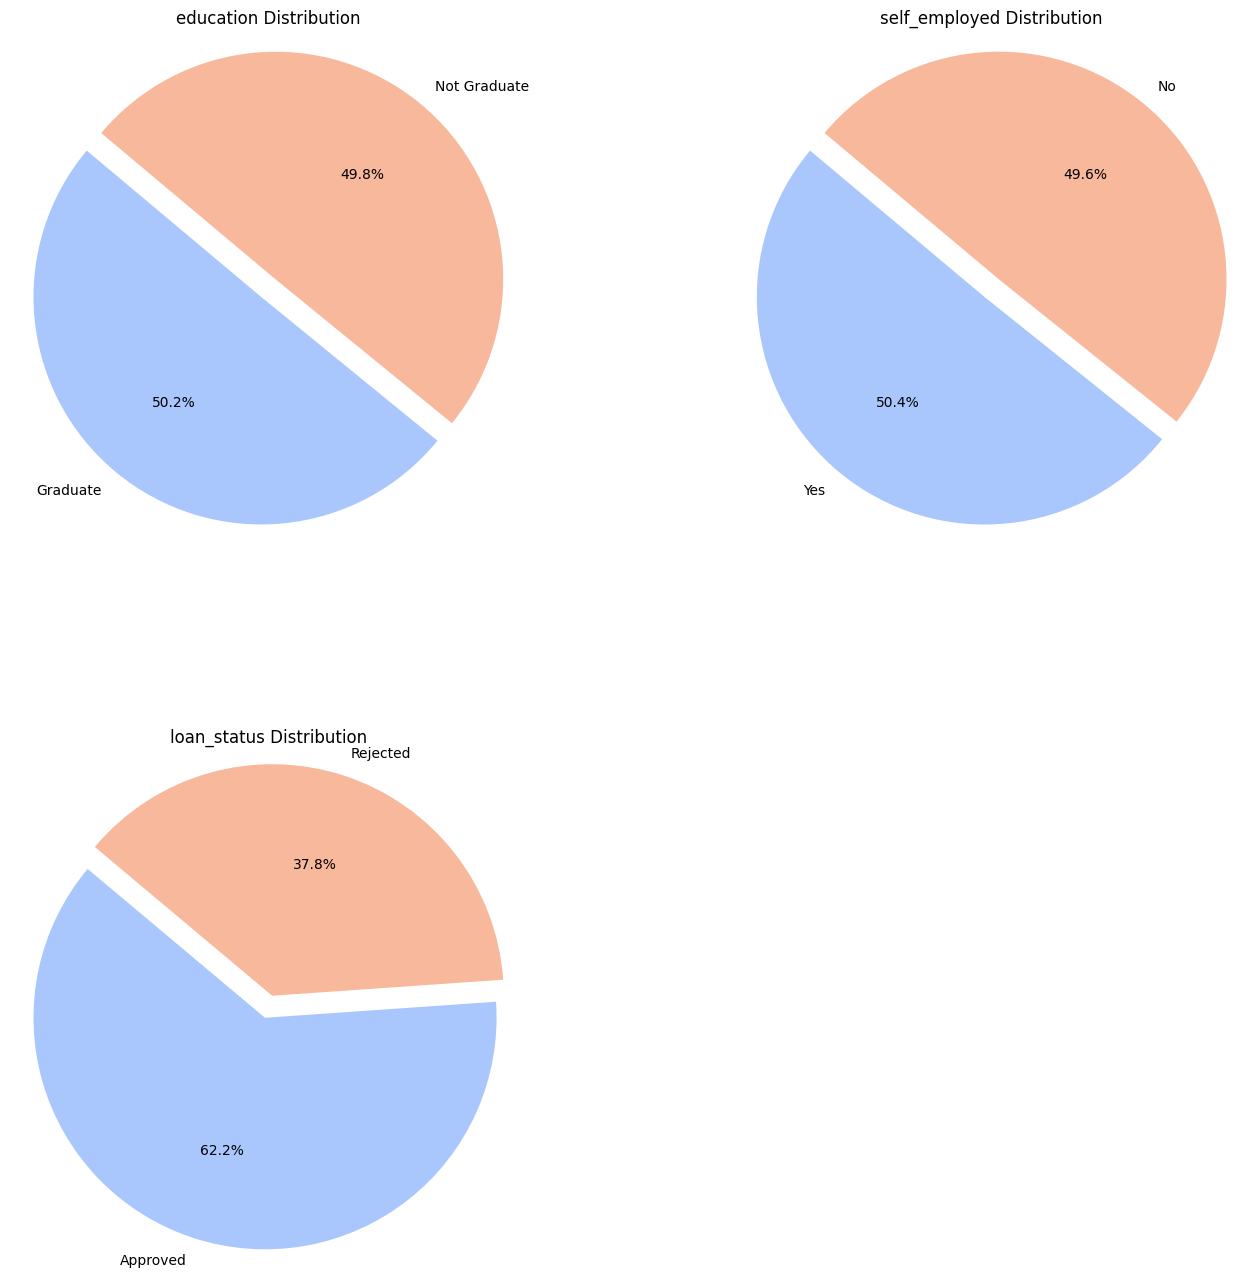

In [9]:
def plot_cat(df, columns):
    """
    Plots pie charts for categorical columns in the DataFrame.

    Args:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to plot.

    Returns:
    - None: Displays the plots.
    """
    num_cols = 2
    num_rows = (len(columns) + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        colors = sns.color_palette("coolwarm", 2)
        loan_status_counts = df[column].value_counts()
        axes[idx].pie(
            loan_status_counts,
            labels=loan_status_counts.index,
            autopct="%1.1f%%",
            startangle=140,
            colors=colors,
            explode=(0.1, 0),
        )
        axes[idx].set_title(f"{column} Distribution")
        axes[idx].axis("equal")

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()


plot_cat(df, df.select_dtypes("object").columns.tolist())

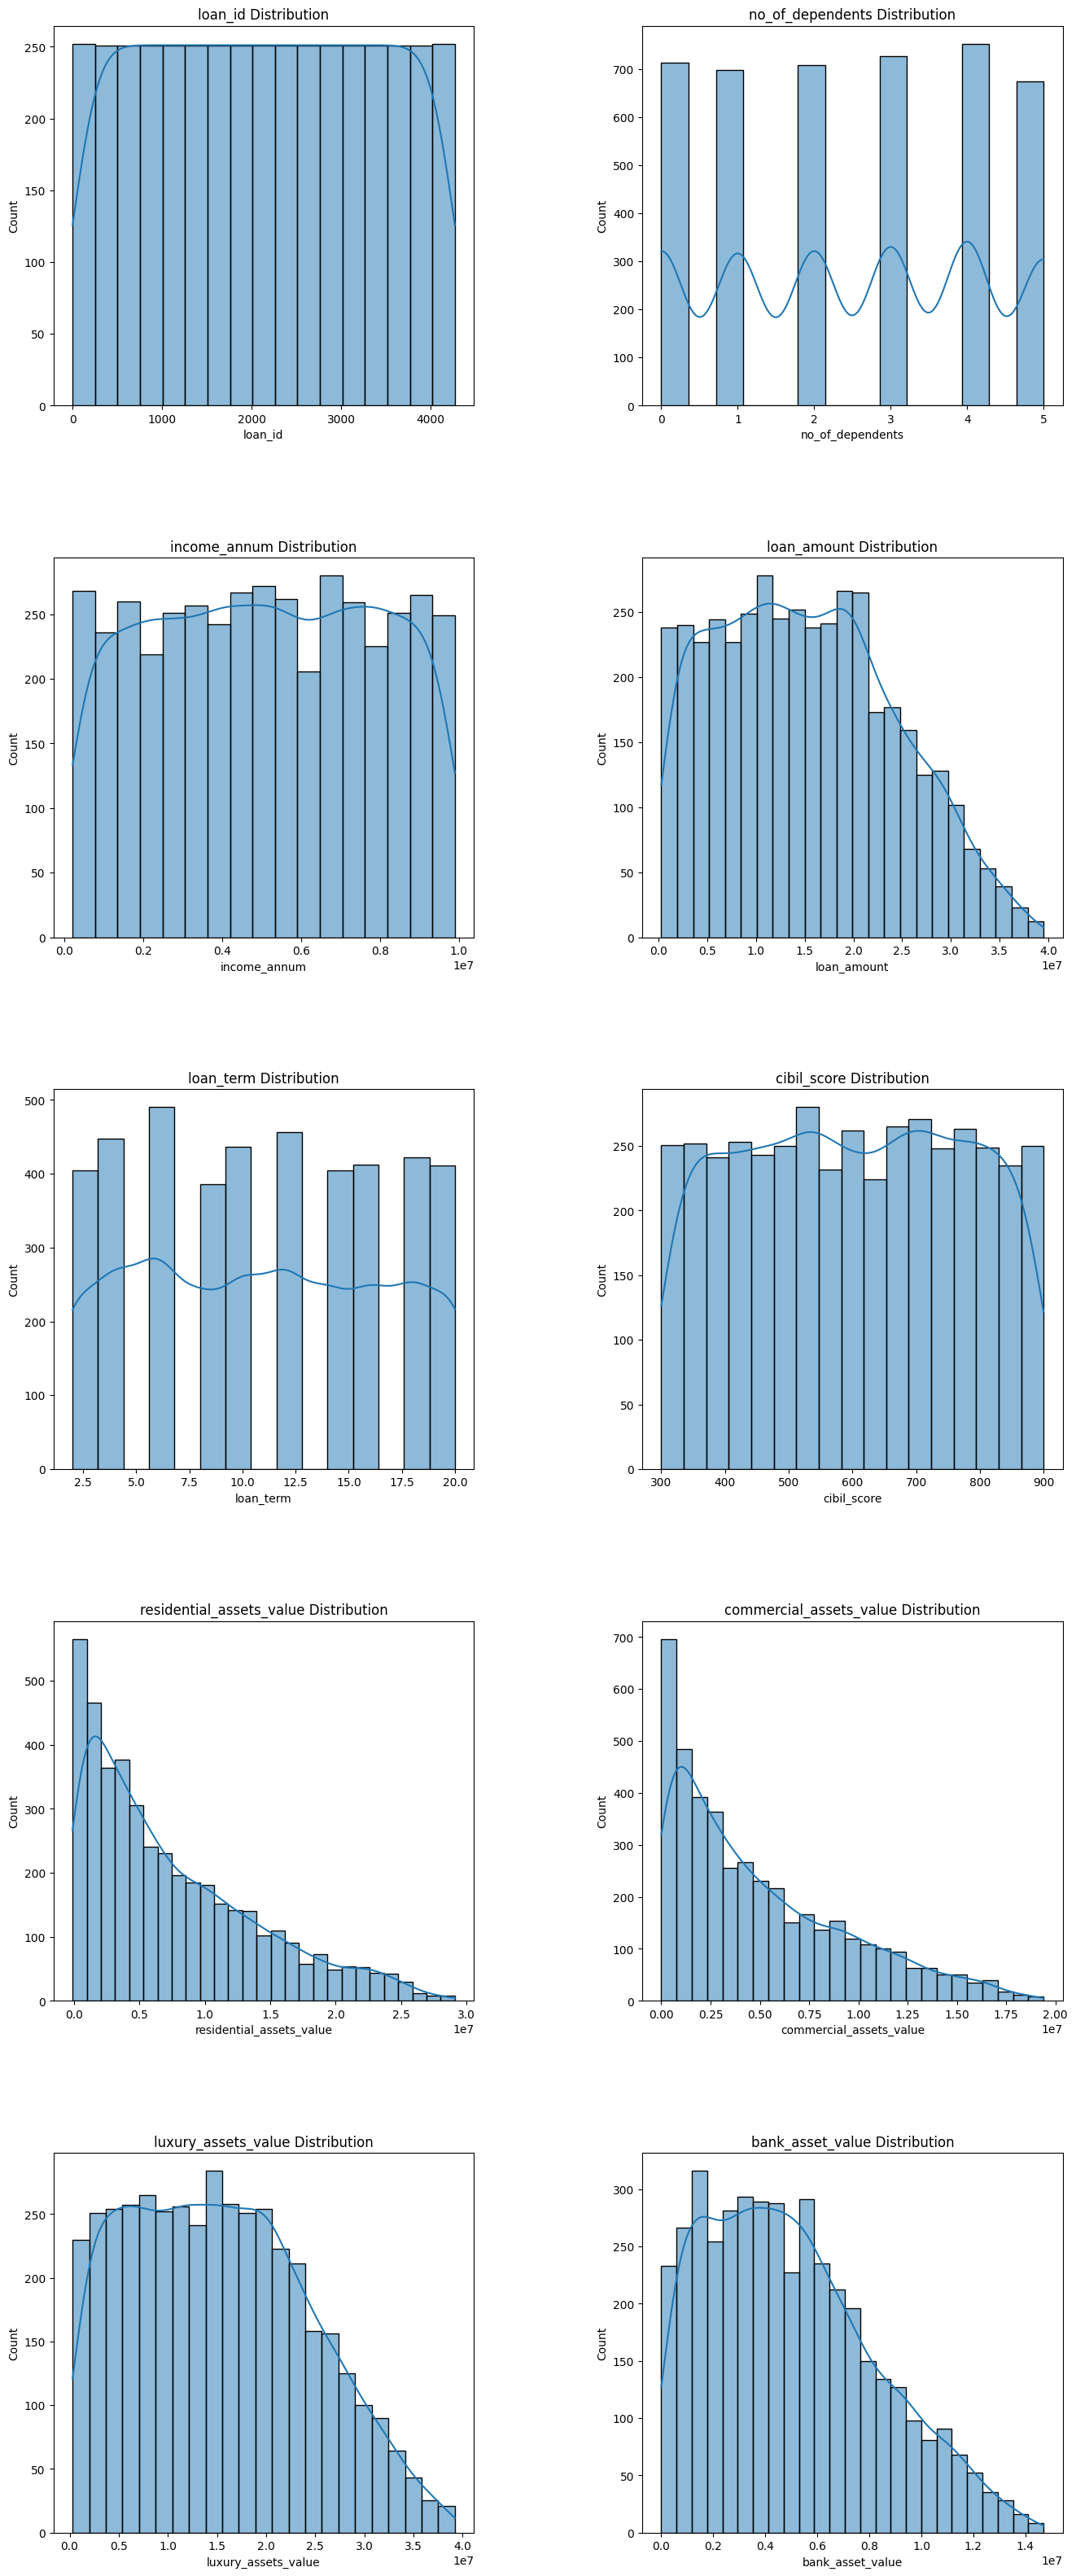

In [10]:
def plot_num(df, columns):
    """
    Plots histograms for numeric columns in the DataFrame.

    Args:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to plot.

    Returns:
    - None: Displays the plots.
    """

    num_cols = 2
    num_rows = (len(columns) + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        sns.histplot(data=df, x=column, ax=axes[idx], kde=True)
        axes[idx].set_title(f"{column} Distribution")
        axes[idx].set_xlabel(column)

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()


plot_num(df, df.select_dtypes(["int", "float"]).columns.tolist())

In [11]:
# target variable is categorical but I make it numeric to look at correlation
df["loan_status"] = df["loan_status"].replace({"Approved": 1, "Rejected": 0})

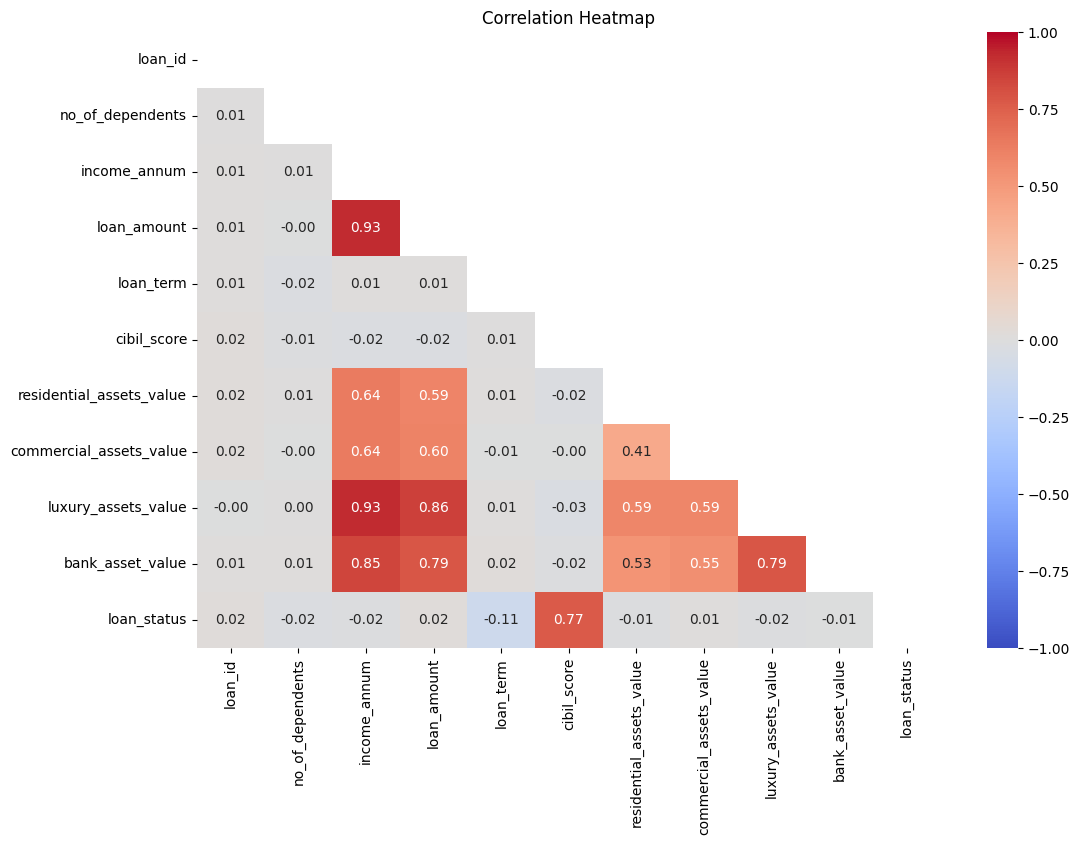

In [12]:
# cibil score gives a lot of information about the target, but such correlation can be risky
# Also, there are pairs with high correlations between features, which may be risky due to lack of data
def plot_corr_heatmap(df):
    """
    Plots a triangular correlation heatmap for numeric columns in the DataFrame.

    Args:
    - df (DataFrame): The DataFrame containing the data.

    Returns:
    - None: Displays the heatmap.
    """

    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1
    )
    plt.title("Correlation Heatmap")
    plt.show()


plot_corr_heatmap(df.select_dtypes(["int", "float"]))

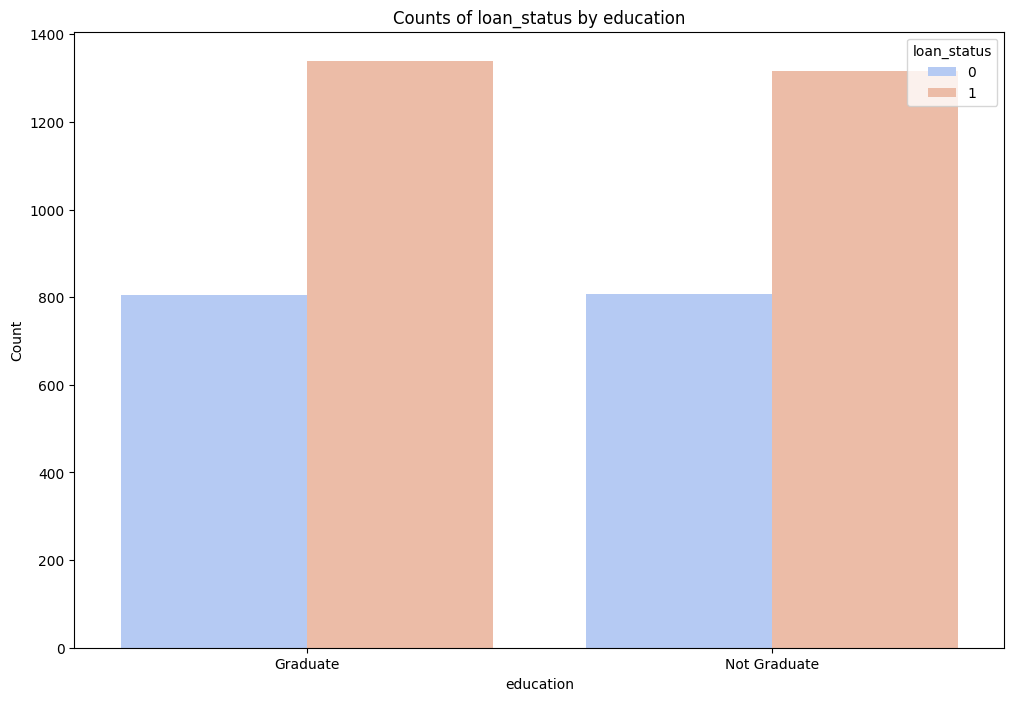

In [13]:
def plot_grouped(df, group_col, count_col):
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=group_col, hue=count_col, palette="coolwarm")
    plt.title(f"Counts of {count_col} by {group_col}")
    plt.xlabel(group_col)
    plt.ylabel("Count")
    plt.legend(title=count_col, loc="upper right")
    plt.show()


# Variables with low unique value do not give much information
plot_grouped(df, "education", "loan_status")

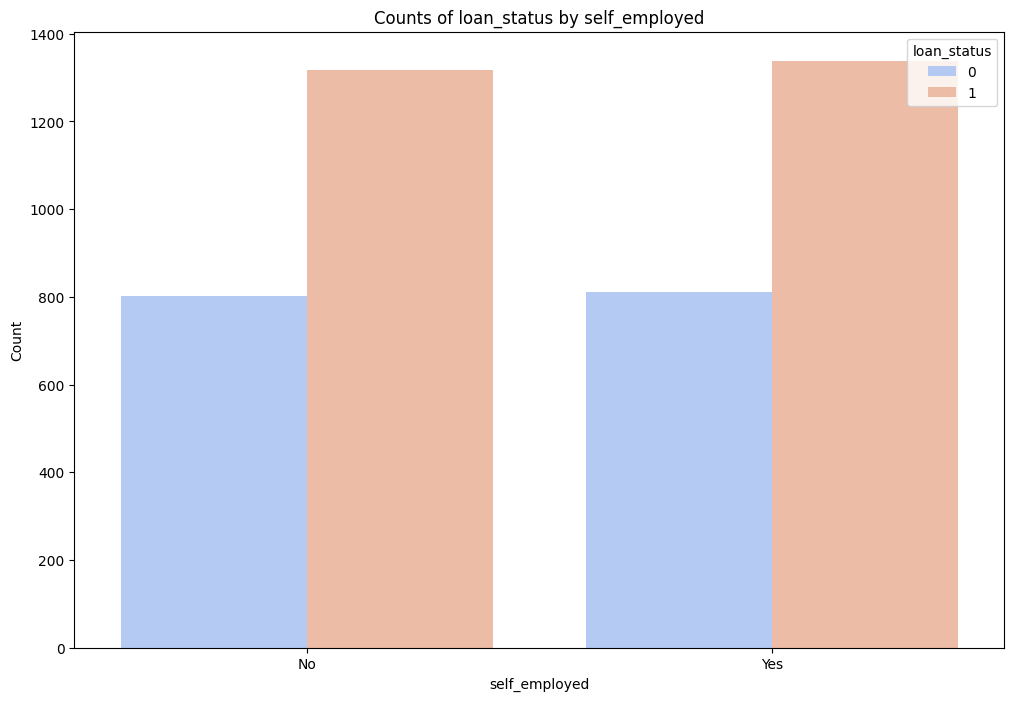

In [14]:
plot_grouped(df, "self_employed", "loan_status")

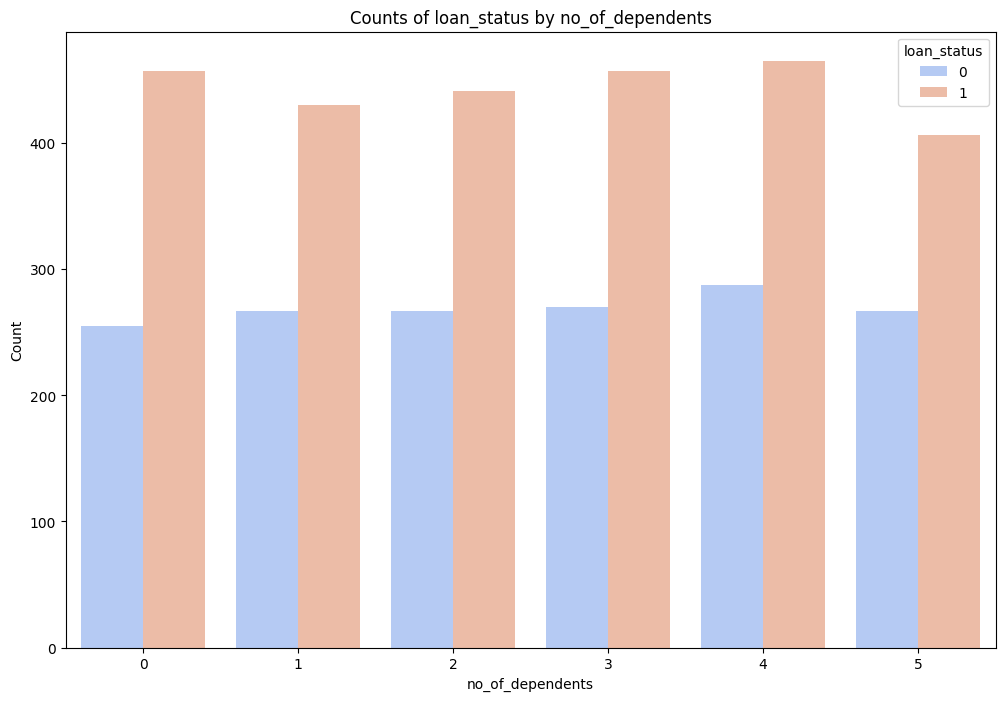

In [15]:
plot_grouped(df, "no_of_dependents", "loan_status")

In [16]:
df["cibil_qcut"] = pd.qcut(df["cibil_score"], 3, labels=["small", "middle", "big"])

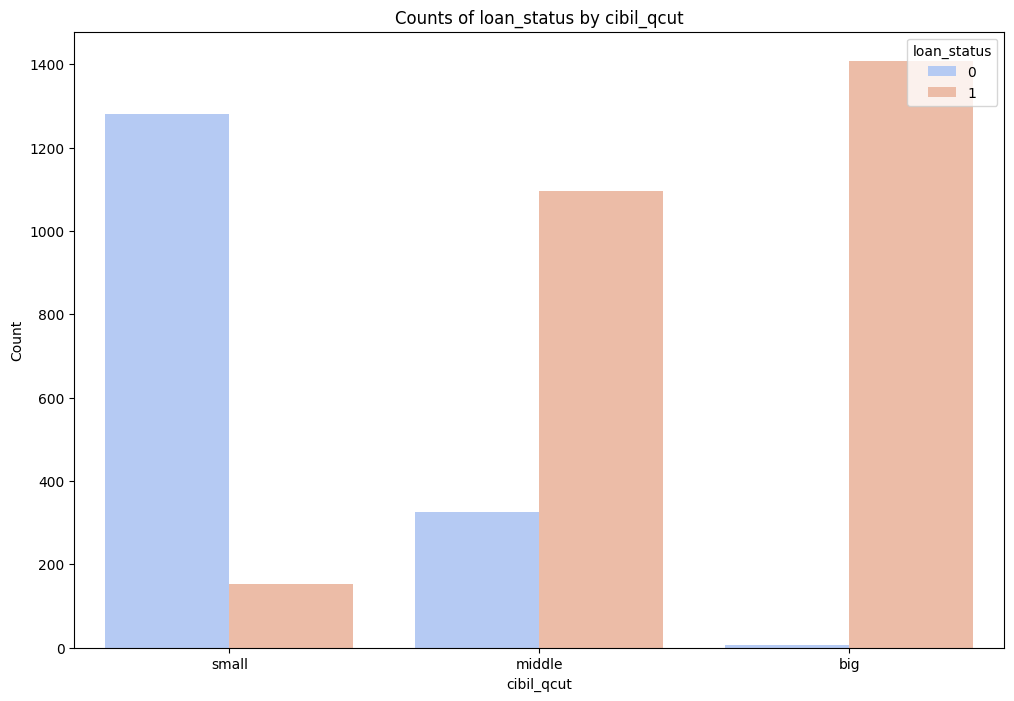

In [17]:
# When the cibil score is low, loan status decreases directly. a valuable variable
plot_grouped(df, "cibil_qcut", "loan_status")

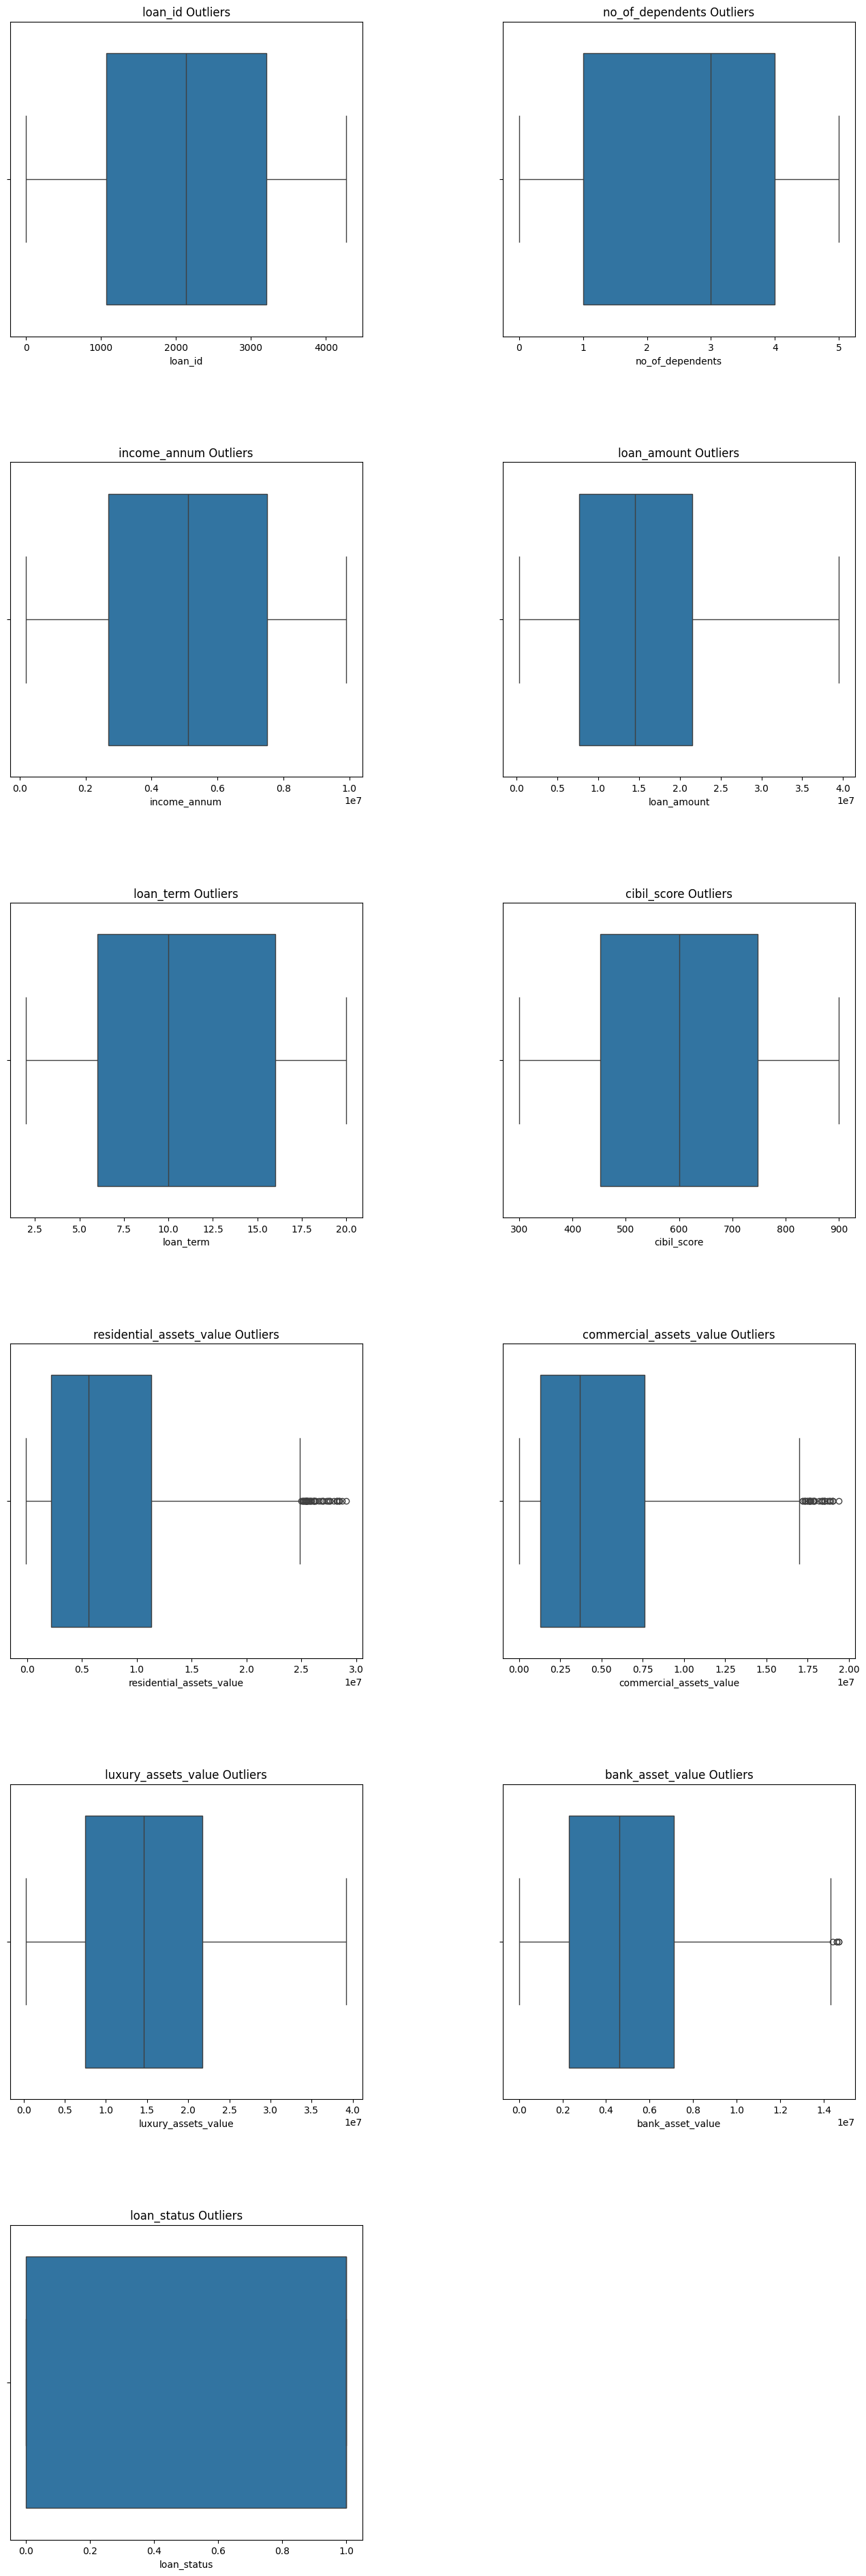

In [18]:
# some columns contain outliers. It may have something to do with those who have a low Cibil score and are accepted, or those who have a high Cibil score and are rejected.
def plot_outliers(df, columns):
    num_cols = 2
    num_rows = (len(columns) + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        sns.boxplot(data=df, x=column, ax=axes[idx])
        axes[idx].set_title(f"{column} Outliers")

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()


plot_outliers(df, df.select_dtypes(["int", "float"]).columns.tolist())

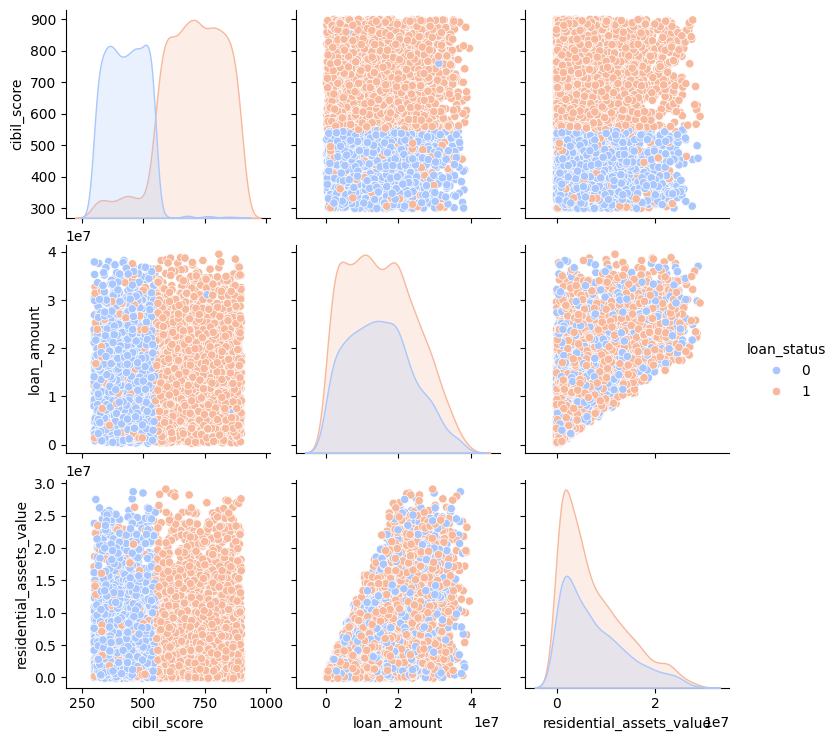

In [19]:
sns.pairplot(
    df[["cibil_score", "loan_status", "loan_amount", "residential_assets_value"]],
    hue="loan_status",
    palette="coolwarm",
)
plt.show()

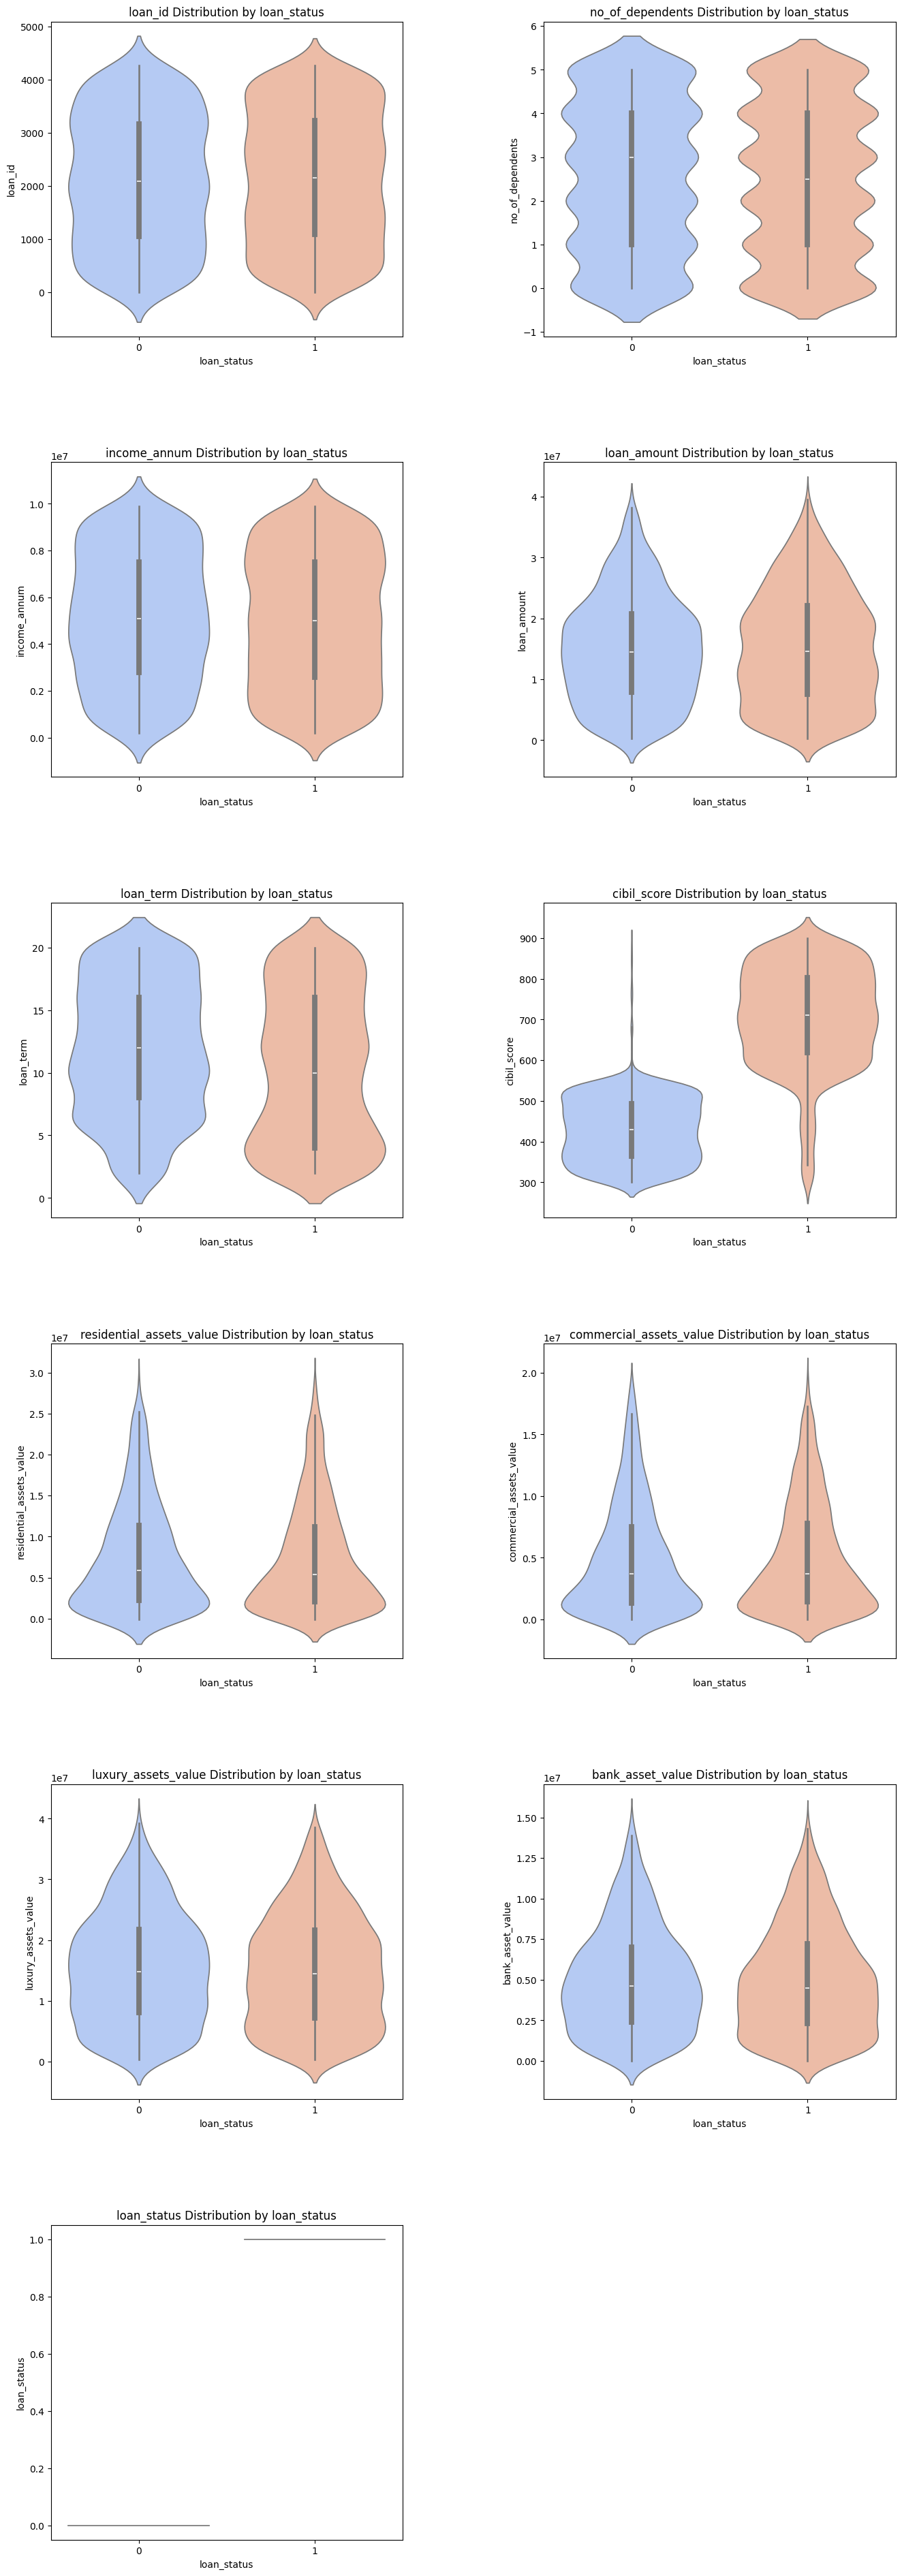

In [20]:
def plot_violin(df, columns, category):
    num_cols = 2
    num_rows = (len(columns) + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        sns.violinplot(data=df, x=category, y=column, ax=axes[idx], palette="coolwarm")
        axes[idx].set_title(f"{column} Distribution by {category}")

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()


plot_violin(df, df.select_dtypes(["int", "float"]).columns.tolist(), "loan_status")

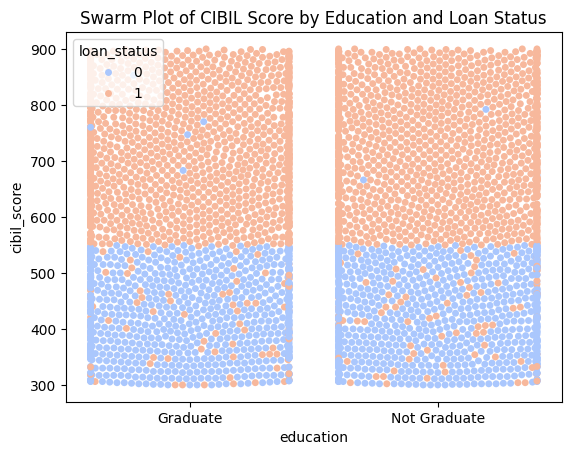

In [21]:
# There are a few people with high credit scores who are rejected, but there are many people with low credit scores who are accepted.
sns.swarmplot(
    data=df, x="education", y="cibil_score", hue="loan_status", palette="coolwarm"
)
plt.title("Swarm Plot of CIBIL Score by Education and Loan Status")
plt.show()

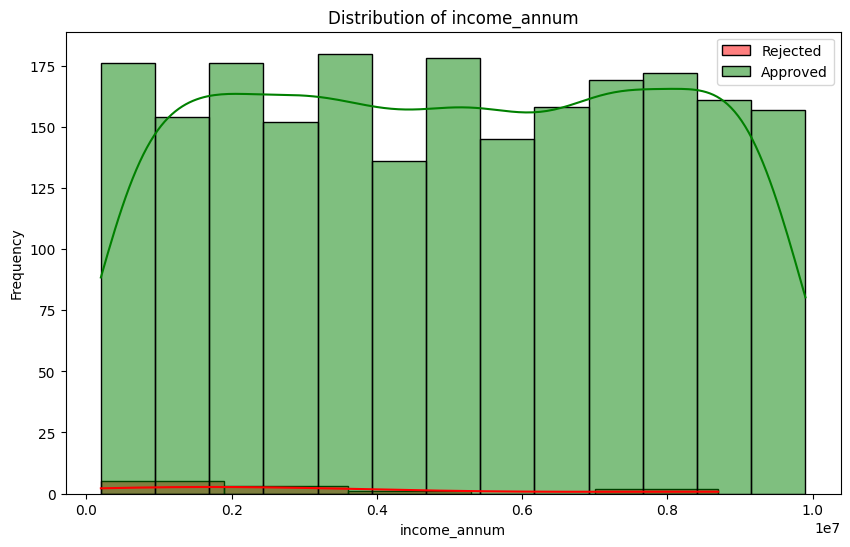

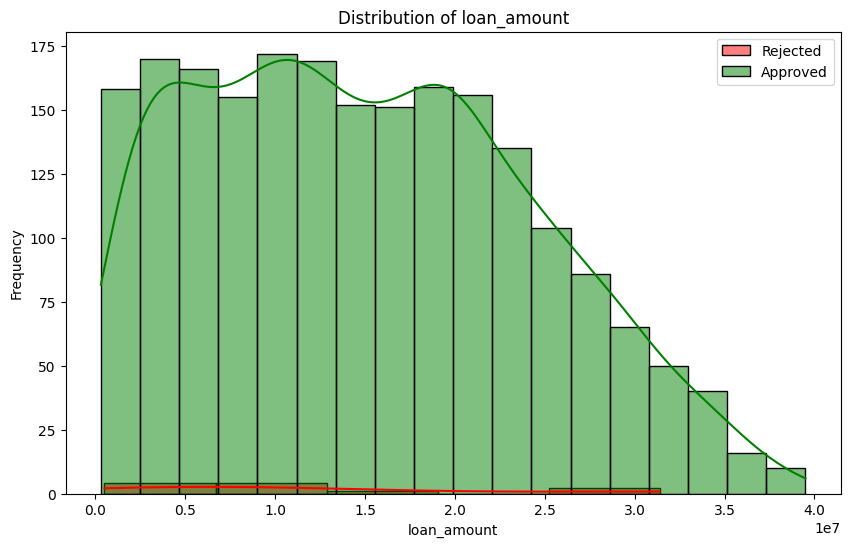

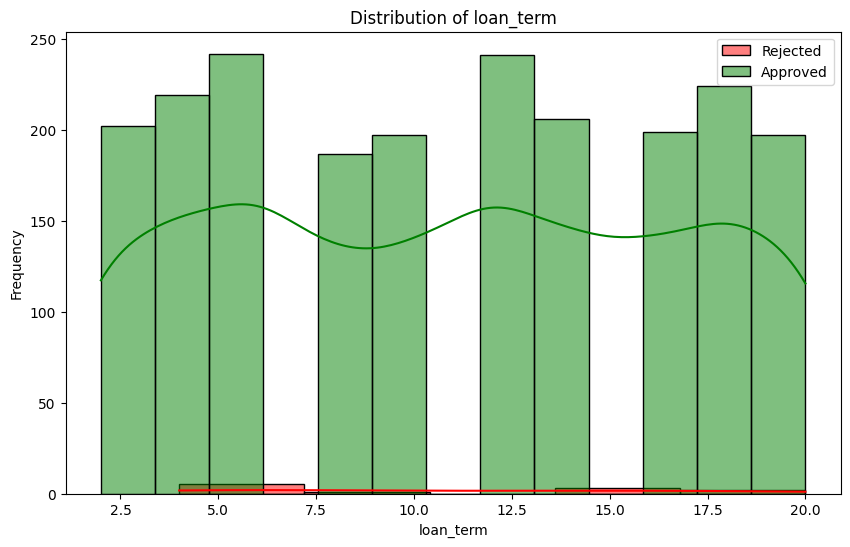

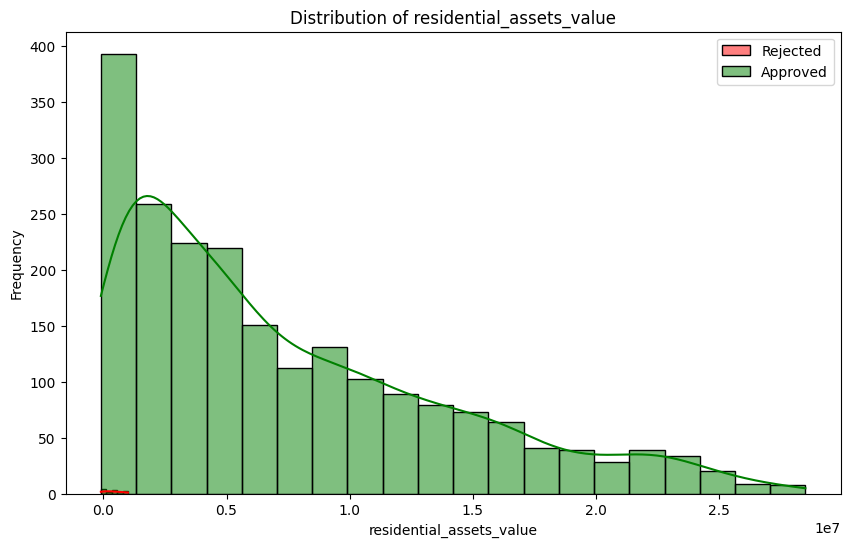

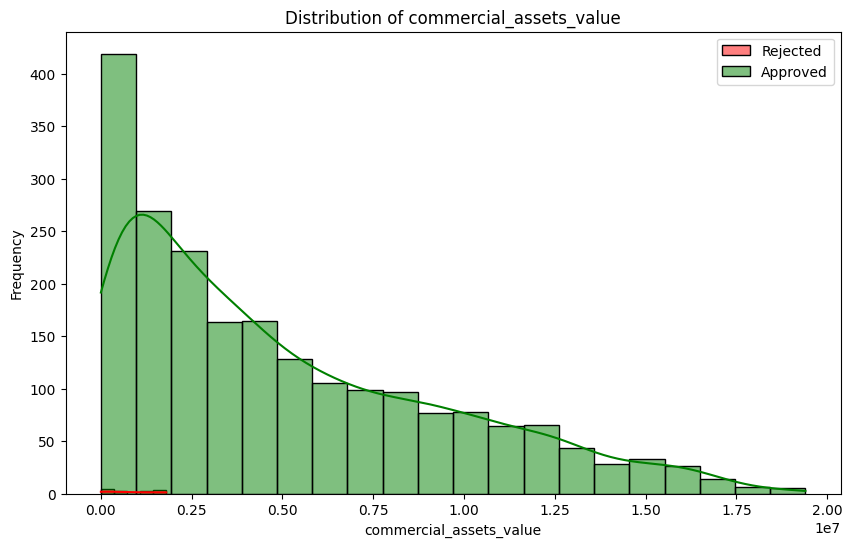

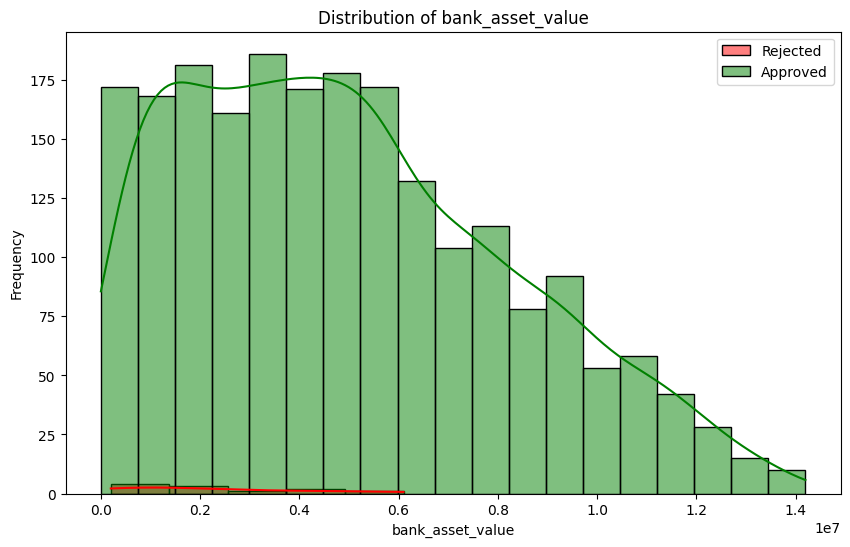

In [22]:
# Even though their cibil scores are high, we see that those who are rejected have lower wealth and income characteristics compared to others.
rejected = df.query("cibil_score>600 & loan_status==0")
approved = df.query("cibil_score>600 & loan_status==1")
cols = [
    "income_annum",
    "loan_amount",
    "loan_term",
    "residential_assets_value",
    "commercial_assets_value",
    "bank_asset_value",
]
for col in cols:
    plt.figure(figsize=(10, 6))

    sns.histplot(rejected[col], kde=True, color="red", label="Rejected", alpha=0.5)
    sns.histplot(approved[col], kde=True, color="green", label="Approved", alpha=0.5)

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

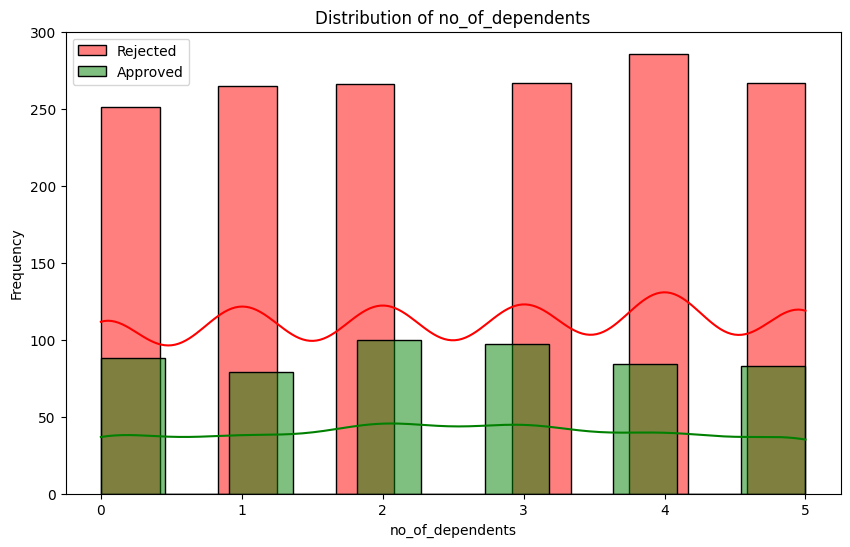

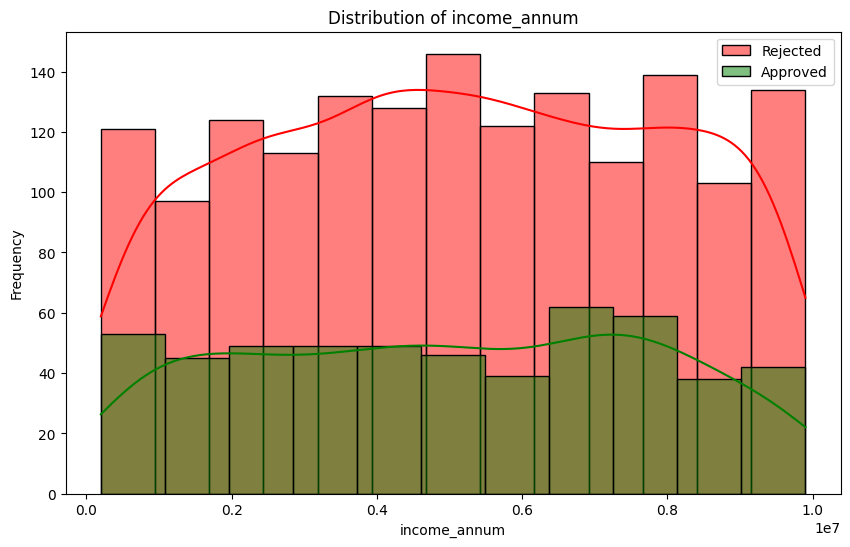

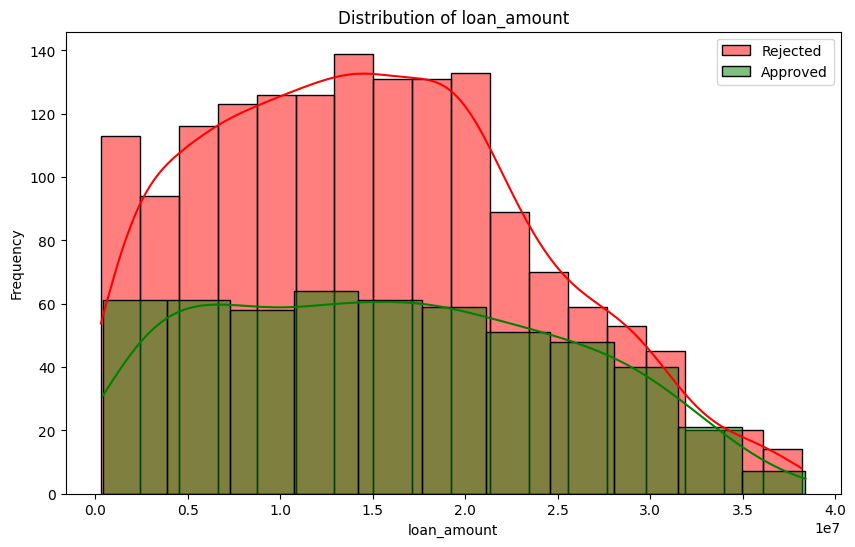

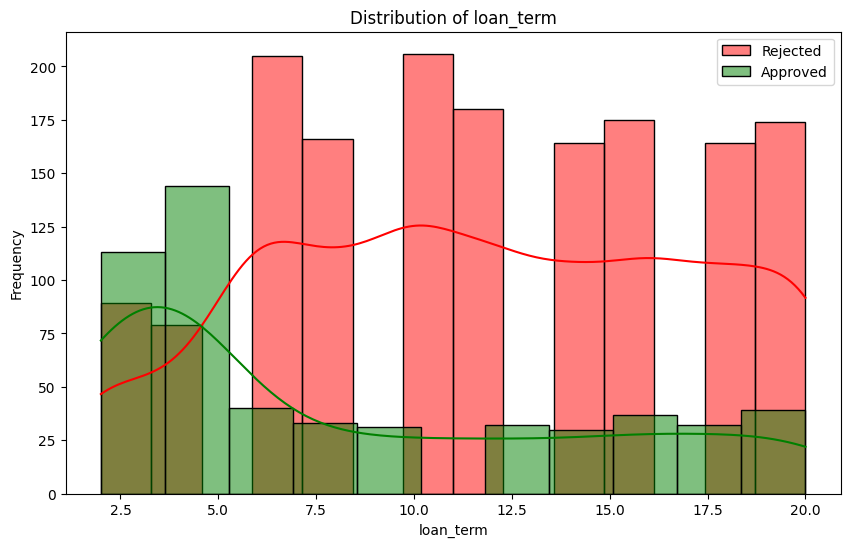

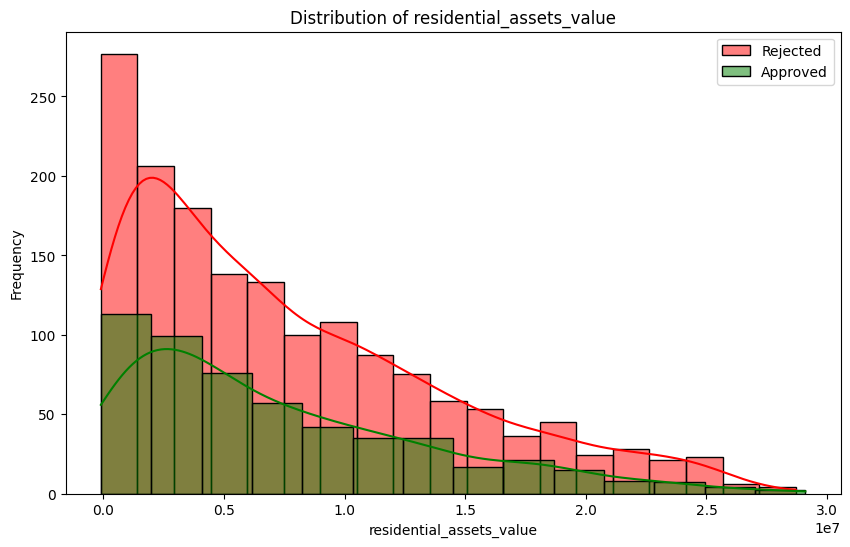

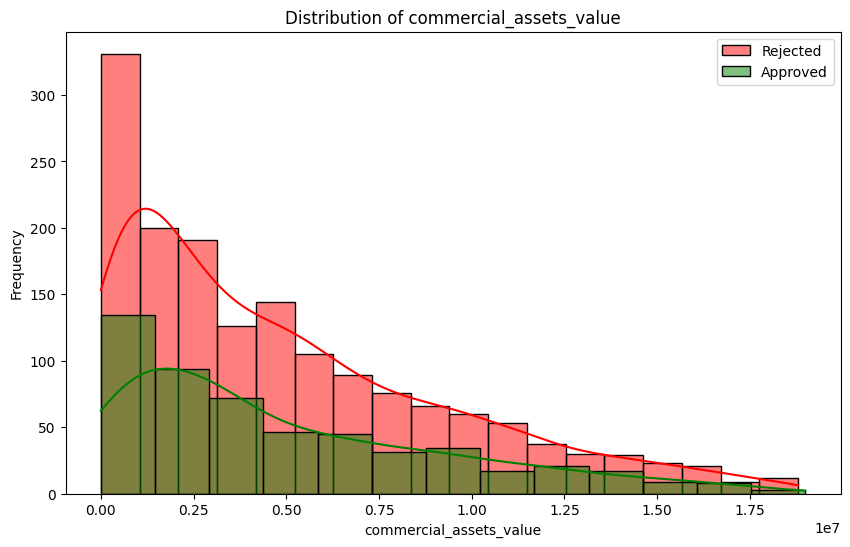

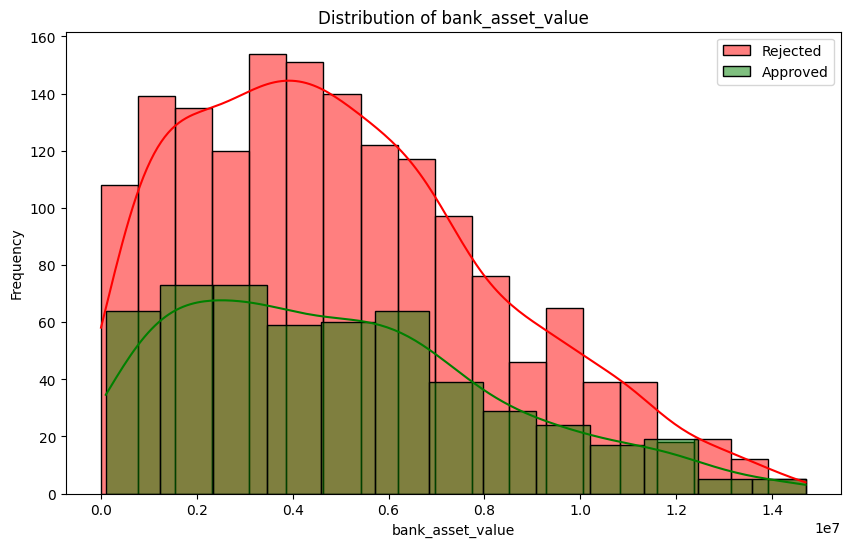

In [23]:
# Those who have low cibil scores and are rejected have higher assets than those who are approved. Although they have higher differences, their rejection requires examination.
# Number of dependents seems important
rejected = df.query("cibil_score<600 & loan_status==0")
approved = df.query("cibil_score<600 & loan_status==1")
cols = [
    "no_of_dependents",
    "income_annum",
    "loan_amount",
    "loan_term",
    "residential_assets_value",
    "commercial_assets_value",
    "bank_asset_value",
]
for col in cols:
    plt.figure(figsize=(10, 6))

    sns.histplot(rejected[col], kde=True, color="red", label="Rejected", alpha=0.5)
    sns.histplot(approved[col], kde=True, color="green", label="Approved", alpha=0.5)

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

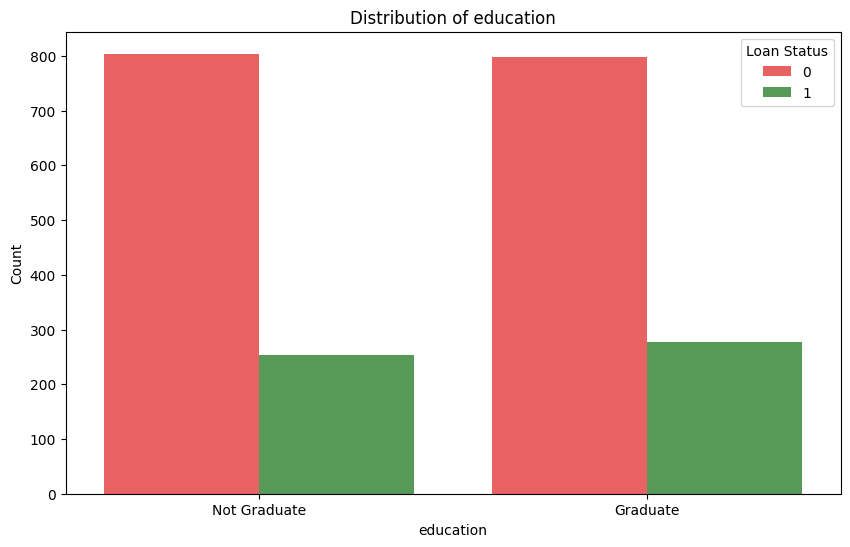

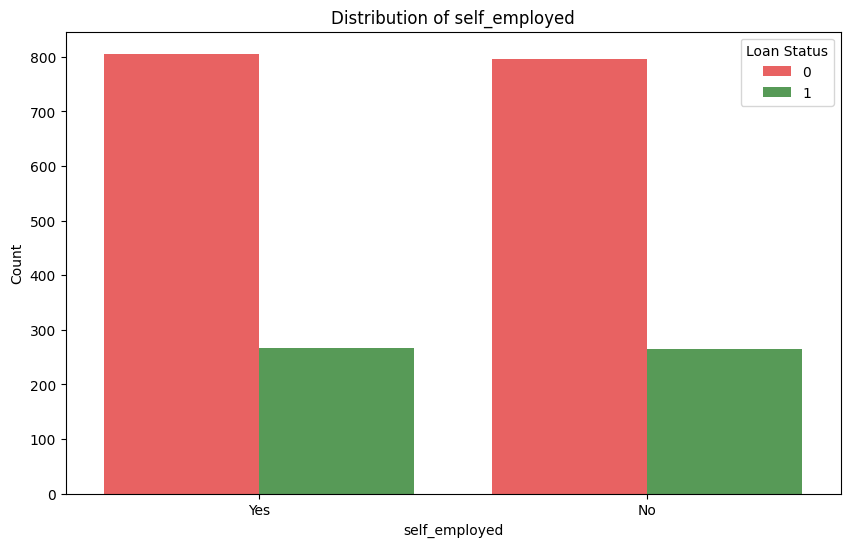

In [24]:
# In cases where the cibil score is low, no inference can be made from the categorical columns about receiving rejection or acceptance.
rejected = df.query("cibil_score<600 & loan_status==0")
approved = df.query("cibil_score<600 & loan_status==1")
combined = pd.concat([rejected, approved])

cols = ["education", "self_employed"]

for col in cols:
    plt.figure(figsize=(10, 6))

    sns.countplot(
        data=combined,
        x=col,
        hue="loan_status",
        palette={0: "red", 1: "green"},
        alpha=0.7,
    )

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Loan Status", labels=[0, 1])
    plt.show()

In [25]:
rejected = df.query("cibil_score<600 & loan_status==0")
approved = df.query("cibil_score<600 & loan_status==1")

display(rejected.describe())
display(approved.describe())

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,1602.000000,1602.000000,1.602000e+03,1.602000e+03,1602.000000,1602.000000,1.602000e+03,1.602000e+03,1.602000e+03,1.602000e+03,1602.0
mean,2108.734082,2.544944,5.127903e+06,1.497066e+07,11.735331,427.199750,7.642135e+06,4.955368e+06,1.536561e+07,5.024282e+06,0.0
std,1223.834374,1.696391,2.767400e+06,8.724064e+06,5.313400,73.470964,6.502126e+06,4.387866e+06,9.008718e+06,3.210512e+06,0.0
min,2.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,4.000000e+05,0.000000e+00,0.0
25%,1056.250000,1.000000,2.800000e+06,8.000000e+06,8.000000,364.000000,2.300000e+06,1.300000e+06,8.100000e+06,2.400000e+06,0.0
50%,2098.000000,3.000000,5.100000e+06,1.450000e+07,12.000000,428.000000,5.950000e+06,3.800000e+06,1.490000e+07,4.600000e+06,0.0
75%,3156.750000,4.000000,7.500000e+06,2.080000e+07,16.000000,492.000000,1.157500e+07,7.500000e+06,2.180000e+07,7.000000e+06,0.0
max,4267.000000,5.000000,9.900000e+06,3.820000e+07,20.000000,587.000000,2.870000e+07,1.880000e+07,3.920000e+07,1.470000e+07,0.0


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,531.000000,531.000000,5.310000e+02,5.310000e+02,531.000000,531.000000,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,531.0
mean,2178.708098,2.487759,4.994350e+06,1.599303e+07,8.225989,521.073446,7.304708e+06,5.011488e+06,1.494068e+07,4.959887e+06,1.0
std,1205.431045,1.673698,2.801806e+06,9.474905e+06,6.050866,85.806585,6.210141e+06,4.389662e+06,9.188040e+06,3.322495e+06,0.0
min,11.000000,0.000000,2.000000e+05,4.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,4.000000e+05,1.000000e+05,1.0
25%,1145.500000,1.000000,2.550000e+06,8.050000e+06,4.000000,475.000000,2.350000e+06,1.400000e+06,7.000000e+06,2.300000e+06,1.0
50%,2174.000000,2.000000,5.000000e+06,1.570000e+07,6.000000,560.000000,5.500000e+06,3.500000e+06,1.410000e+07,4.500000e+06,1.0
75%,3236.500000,4.000000,7.400000e+06,2.350000e+07,14.000000,582.000000,1.090000e+07,7.600000e+06,2.145000e+07,7.000000e+06,1.0
max,4266.000000,5.000000,9.900000e+06,3.840000e+07,20.000000,599.000000,2.910000e+07,1.900000e+07,3.860000e+07,1.470000e+07,1.0
